### ⚡ Install music21 & musescore 

In [1]:
!pip3 install music21

In [ ]:
!sudo apt-get update
!sudo add-apt-repository ppa:mscore-ubuntu/mscore3-stable
!sudo apt-get install musescore3

### ⚡ musesocre 경로 확인 & music21 환경 설정

In [ ]:
!which mscore3

In [ ]:
import music21 as m21

# MuseScore 경로 설정
m21.environment.set('musescoreDirectPNGPath', '/usr/bin/mscore3')

# 이후에는 MusicXML 파일을 보여주는 코드를 실행하면 됩니다.

In [3]:
import music21 as m21

# MuseScore 경로 확인
print(m21.environment.get('musescoreDirectPNGPath'))

/usr/bin/mscore


### ⚡ MusicXML 생성

#### drum - music21 note info mapping 한 객체

In [1]:
# 드럼 악기 정보 저장을 위한 클래스
class DrumInstrument:
    def __init__(self, pitch, notehead_x):
        self.pitch = pitch
        self.notehead_x = notehead_x

# 드럼 악기 정보를 매핑
drum_instruments = {
    "Bass Drum 1": DrumInstrument('F4', False),
    "Open Hi-Hat": DrumInstrument('G5', True),
    "Closed Hi-Hat": DrumInstrument('G5', True),
    "Crash Cymbal 1": DrumInstrument('A5', True),
    "Ride Cymbal 1": DrumInstrument('F5', True),
    "High Tom": DrumInstrument('E5', False),
    "Mid Tom": DrumInstrument('D5', False),
    "Low Tom": DrumInstrument('A4', False),
    "Acoustic Snare": DrumInstrument('C5', False),
}

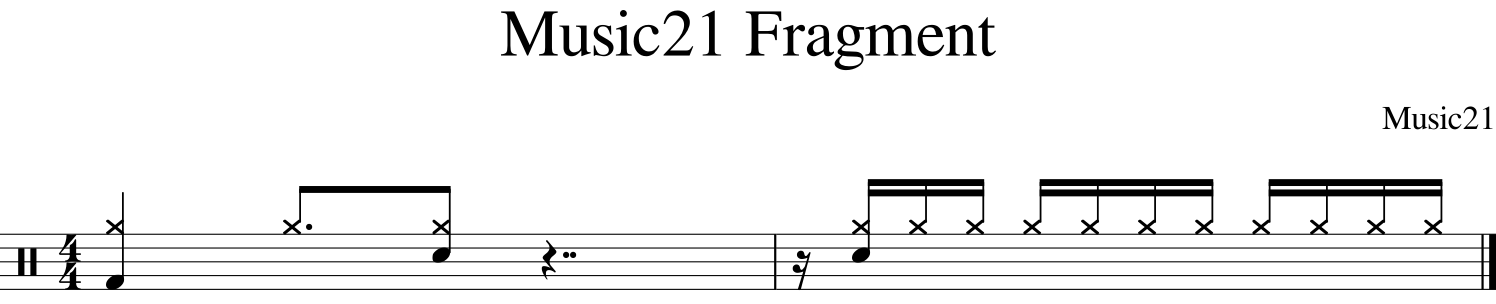

<Figure size 640x480 with 0 Axes>

In [2]:
import music21 as m21
import matplotlib.pyplot as plt
from music21 import converter, stream, note, meter, tempo, instrument, clef

# Score 객체 생성
score = m21.stream.Score()

# 퍼커션 트랙 생성
percussion_track = stream.Part()
percussion_track.append(instrument.Percussion())

# 퍼커션 노트 리스트 (한 시간 위치에 여러 노트를 추가)
percussion_notes = [
    (["Bass Drum 1", "Closed Hi-Hat"], 1.0, True),  # 두 개의 노트를 동시에
    (["Open Hi-Hat"], 0.75, True),
    (["Acoustic Snare", "Closed Hi-Hat"], 0.5, True),
    (["Rest"], 2.0, False),
    (["Open Hi-Hat", "Acoustic Snare"], 0.25, True),
    (["Open Hi-Hat"], 0.25, True),
    (["Open Hi-Hat"], 0.25, True),
    (["Open Hi-Hat"], 0.25, True),
    (["Open Hi-Hat"], 0.25, True),
    (["Open Hi-Hat"], 0.25, True),
    (["Open Hi-Hat"], 0.25, True),
    (["Open Hi-Hat"], 0.25, True),
    (["Open Hi-Hat"], 0.25, True),
    (["Open Hi-Hat"], 0.25, True),
    (["Open Hi-Hat"], 0.25, True),
]

# 드럼 클레프 생성
drum_clef = clef.PercussionClef()
percussion_track.append(drum_clef)

# 4/4 박자 생성
time_signature = meter.TimeSignature('4/4')
percussion_track.append(time_signature)

# 각 시간 위치에서 노트를 동시 추가하기 위해 Chord 생성
for drum_notes, _duration, is_note in percussion_notes:
    notes = []

    if is_note:
        for drum_note in drum_notes:
            # 드럼 노트 생성 (노트의 음 높이는 Percussion 악기에서는 중요하지 않음)
            n = m21.note.Unpitched(displayName=drum_instruments[drum_note].pitch)
            n.duration.quarterLength = _duration
                   
            n.stemDirection = 'up'

            if drum_instruments[drum_note].notehead_x:
                n.notehead = 'x'
            
            notes.append(n)
        # Chord로 노트 추가
        chord = m21.percussion.PercussionChord(notes)
        chord.stemDirection = 'up'  # Chord의 모든 노트의 꼬리 방향을 위로 설정
        percussion_track.append(chord)
    else:
        rest = m21.note.Rest()
        rest.duration.quarterLength = _duration
        percussion_track.append(rest)
    
def show_sheet_music(xml_file):
    # XML 파일을 music21 Stream 객체로 변환
    score = converter.parse(xml_file)
    
    # 악보 이미지로 보여주기
    score.show()

    # 악보 이미지의 배경 색상을 흰색으로 설정
    fig = plt.gcf()
    fig.patch.set_facecolor('white')
    plt.show()

# Score 객체에 퍼커션 트랙 추가
score.insert(0, percussion_track)

# MusicXML 파일로 저장
score.write('musicxml', "drum_score.xml")

# 악보 출력
show_sheet_music("drum_score.xml")
